# doped Example Workbook

In [1]:
from doped import vasp_input
from doped.pycdt.core.defectsmaker import ChargedDefectsStructures
from pymatgen.core.structure import Structure

In [2]:
perfect_supercell = Structure.from_file("Examples/perfect_supercell_POSCAR")  # CdTe

def_structs = ChargedDefectsStructures(
    perfect_supercell,
    cellmax=perfect_supercell.num_sites,
    substitutions={"Te": ["Se"]},  # As a dictionary
    antisites_flag=True,
    include_interstitials=True,
)

Setting up defects...
Searching for Voronoi interstitial sites (this can take awhile)...

Number of jobs created:
    bulk = 1
    vacancies:
        vac_1_Cd = 5 with site multiplicity 32
        vac_2_Te = 5 with site multiplicity 32
    substitutions:
        sub_2_Se_on_Te = 7 with site multiplicity 32
        as_1_Cd_on_Te = 7 with site multiplicity 32
        as_1_Te_on_Cd = 7 with site multiplicity 32
    interstitials:
        Int_Cd_1 = 3 with site multiplicity 32
        Int_Cd_2 = 3 with site multiplicity 128
        Int_Cd_3 = 3 with site multiplicity 1
        Int_Te_1 = 9 with site multiplicity 1
        Int_Te_2 = 9 with site multiplicity 128
        Int_Te_3 = 9 with site multiplicity 32
Total (non dielectric) jobs created = 68



In [4]:
# Expand the output of this cell to see what the ChargedDefectsStructures output
# dictionary looks like #noblackboxesherepal
print(def_structs.defects)

{'bulk': {'name': 'bulk', 'supercell': {'size': [1, 1, 1], 'structure': Structure Summary
Lattice
    abc : 13.086768 13.086768 13.086768
 angles : 90.0 90.0 90.0
 volume : 2241.2856479961474
      A : 13.086768 0.0 0.0
      B : 0.0 13.086768 0.0
      C : 0.0 0.0 13.086768
PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Cd (0.0000, 0.0000, 6.5434) [0.0000, 0.0000, 0.5000]
PeriodicSite: Cd (0.0000, 6.5434, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Cd (0.0000, 6.5434, 6.5434) [0.0000, 0.5000, 0.5000]
PeriodicSite: Cd (6.5434, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Cd (6.5434, 0.0000, 6.5434) [0.5000, 0.0000, 0.5000]
PeriodicSite: Cd (6.5434, 6.5434, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cd (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]
PeriodicSite: Cd (0.0000, 3.2717, 3.2717) [0.0000, 0.2500, 0.2500]
PeriodicSite: Cd (0.0000, 3.2717, 9.8151) [0.0000, 0.2500, 0.7500]
PeriodicSite: Cd (0.0000, 9.8151, 3.2717) [0.0000, 0.7

In [48]:
vacancies_only = {"vacancies": [val for val in def_structs.defects["vacancies"]]}
substitutions_only = {
    "substitutions": [val for val in def_structs.defects["substitutions"]]
}
interstitials_only = {
    "interstitials": [val for val in def_structs.defects["interstitials"]]
}

In [49]:
# Look at the PyCDT-proposed likely defect charge states, and think if ya wanna change it
for val in substitutions_only["substitutions"]:
    print(f"Defect: {val['name']}")
    print(f"PyCDT-proposed defect charge states: {val['charges']}")
    print("Happy with this? If not look at the next code block yeh \n")

Defect: sub_2_Se_on_Te
PyCDT-proposed defect charge states: [-1, 0, 1, 2, 3, 4, 5]
Happy with this? If not look at the next code block yeh 

Defect: as_1_Cd_on_Te
PyCDT-proposed defect charge states: [-2, -1, 0, 1, 2, 3, 4]
Happy with this? If not look at the next code block yeh 

Defect: as_1_Te_on_Cd
PyCDT-proposed defect charge states: [-2, -1, 0, 1, 2, 3, 4]
Happy with this? If not look at the next code block yeh 



In [50]:
# Can manually set the charge states you want to investigate, if the auto-generated ones from PyCDT
# (using observed oxidatation states) aren't the exact range you want to calculate
for val in substitutions_only["substitutions"]:
    if val["name"] == "as_1_Cd_on_Te":
        val["charges"] = [0, 1, 2]
    elif val["name"] == "as_1_Te_on_Cd":
        val["charges"] = [-2, -1, 0]
for val in interstitials_only["interstitials"]:
    if val["site_specie"] == "Te":
        val["charges"] = [-2, -1, 0]
for val in vacancies_only["vacancies"]:
    if val["site_specie"] == "Cd":
        val["charges"] = [-2, -1, 0]
    elif val["site_specie"] == "Te":
        val["charges"] = [0, 1, 2]

In [51]:
# Look at the new range of defect charge states
for val in substitutions_only["substitutions"]:
    print(f"Defect: {val['name']}")
    print(f"New defect charge states: {val['charges']}\n")

Defect: sub_2_Se_on_Te
New defect charge states: [-1, 0, 1, 2, 3, 4, 5]

Defect: as_1_Cd_on_Te
New defect charge states: [0, 1, 2]

Defect: as_1_Te_on_Cd
New defect charge states: [-2, -1, 0]



In [52]:
cdte_vacancies = vasp_input.prepare_vasp_defect_inputs(vacancies_only)
# Generates a dictionary of folders for VASP defect calculations
# Can do the same with the substitutions and interstitials with:
# cdte_substitutions = prepare_vasp_defect_inputs(substitutions_only)
# cdte_interstitials = prepare_vasp_defect_inputs(interstitials_only)

vac_1_Cd_-2
vac_1_Cd_-1
vac_1_Cd_0
vac_2_Te_0
vac_2_Te_1
vac_2_Te_2


In [10]:
cdte_vacancies  # Expand the output of this cell to see what the prepare_vasp_defect_inputs output
# dictionary looks like #noblackboxesherepal

{'vac_1_Cd_-2': {'Defect Structure': Structure Summary
  Lattice
      abc : 13.086768 13.086768 13.086768
   angles : 90.0 90.0 90.0
   volume : 2241.2856479961474
        A : 13.086768 0.0 0.0
        B : 0.0 13.086768 0.0
        C : 0.0 0.0 13.086768
  PeriodicSite: Cd (0.0000, 0.0000, 6.5434) [0.0000, 0.0000, 0.5000]
  PeriodicSite: Cd (0.0000, 6.5434, 0.0000) [0.0000, 0.5000, 0.0000]
  PeriodicSite: Cd (0.0000, 6.5434, 6.5434) [0.0000, 0.5000, 0.5000]
  PeriodicSite: Cd (6.5434, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
  PeriodicSite: Cd (6.5434, 0.0000, 6.5434) [0.5000, 0.0000, 0.5000]
  PeriodicSite: Cd (6.5434, 6.5434, 0.0000) [0.5000, 0.5000, 0.0000]
  PeriodicSite: Cd (6.5434, 6.5434, 6.5434) [0.5000, 0.5000, 0.5000]
  PeriodicSite: Cd (0.0000, 3.2717, 3.2717) [0.0000, 0.2500, 0.2500]
  PeriodicSite: Cd (0.0000, 3.2717, 9.8151) [0.0000, 0.2500, 0.7500]
  PeriodicSite: Cd (0.0000, 9.8151, 3.2717) [0.0000, 0.7500, 0.2500]
  PeriodicSite: Cd (0.0000, 9.8151, 9.8151) [0.0000, 0.

The next code block shows the function description - can do this for other functions to check the docstring for required arguments etc.

In [47]:
vasp_input.prepare_vasp_defect_inputs?

Signature: vasp_input.prepare_vasp_defect_inputs(defects: dict) -> dict
Docstring:
Generates a dictionary of folders for VASP defect calculations
Args:
    defects (dict):
        Dictionary of defect-object-dictionaries from PyCDT's
        ChargedDefectsStructures class (see example notebook)
File:      ~/OneDrive - Imperial College London/Bread/Projects/Packages/doped/doped/vasp_input.py
Type:      function


In [34]:
vasp_input.prepare_vasp_defect_dict?

Signature:
vasp_input.prepare_vasp_defect_dict(
    defects: dict,
    write_files: bool = False,
    sub_folders: list = None,
) -> dict
Docstring:
Creates a transformation dictionary so we can tell PyCDT the
initial defect site for post-processing analysis, in case it
can't do it itself later on (common if multiple relaxations occur)
        Args:
            defects (dict):
                Dictionary of defect-object-dictionaries from PyCDT's
                ChargedDefectsStructures class (see example notebook)
            write_files (bool):
                If True, write transformation.json files to
                {defect_folder}/ or {defect_folder}/{*sub_folders}/
                if sub_folders specified
                (default: False)
            sub_folders (list):
                List of sub-folders (in the defect folder) to write
                the transformation.json file to
                (default: None)
File:      ~/OneDrive - Imperial College London/Bread/Projects/Pac

In [53]:
# Make the transformation dictionary so we can tell PyCDT the initial defect site (as a failsafe for easy
# post-processing analysis later on, in case the pymatgen functions can't automatically 'detect'
# the defect site in our final relaxed structure)
defect_subfolders_dict_transf = vasp_input.prepare_vasp_defect_dict(
    vacancies_only, write_files=True
)
# Setting write_files=True means that this will create folders for each defect in the current directory
# with the defect transformation.json file (will possibly be useful later on for easy post-processing)

In [54]:
defect_subfolders_dict_transf = vasp_input.prepare_vasp_defect_dict(
    vacancies_only, write_files=True, sub_folders=["vasp_gam", "vasp_std", "vasp_ncl"]
)
# Setting write_files=True and providing a list of sub_folders means that this will create subfolders in
# each defect folder (in the current working directory) with the defect transformation.json file
# (useful to have this file in each individual calculation folder - can perform post-processing analysis at
# different stages of the calculations (i.e. if you want to analyse the vasp_gam relaxation results before
# running the vasp_std relaxation etc.)

In [55]:
defect_subfolders_dict_transf
# Expand the output of this cell to see what the prepare_vasp_defect_dict output
# dictionary looks like. #noblackboxesherepal

{'vac_1_Cd_-2': {'defect_type': 'vac_1_Cd',
  'defect_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_supercell_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_multiplicity': 32,
  'charge': -2,
  'supercell': [1, 1, 1]},
 'vac_1_Cd_-1': {'defect_type': 'vac_1_Cd',
  'defect_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_supercell_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_multiplicity': 32,
  'charge': -1,
  'supercell': [1, 1, 1]},
 'vac_1_Cd_0': {'defect_type': 'vac_1_Cd',
  'defect_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_supercell_site': PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000],
  'defect_multiplicity': 32,
  'charge': 0,
  'supercell': [1, 1, 1]},
 'vac_2_Te_0': {'defect_type': 'vac_2_Te',
  'defect_site': PeriodicSite: Te (1.6358, 1.6358, 4.9075) [0.1250, 0.1

## Prepare `vasp_gam` relaxation calculation files

In [56]:
for key, val in cdte_vacancies.items():
    vasp_input.vasp_gam_files(
        val, input_dir=key, incar_settings={"ENCUT": 350} # Custom INCAR settings
    )  
# Prepare the vasp_gam relaxation input files (in "{defect_folder}/vasp_gam" 
# - have a look if ya don't believe me yeh)
# Highly recommended to look at output INCARs or doped.vasp_input source code,
# to see what the default INCAR settings are.

In [41]:
vasp_input.vasp_gam_files??

Signature:
vasp_input.vasp_gam_files(
    single_defect_dict: dict,
    input_dir: str = None,
    incar_settings: dict = None,
) -> None
Docstring:
Generates input files for VASP Gamma-point-only rough relaxation
(before more expensive vasp_std relaxation)
Args:
    single_defect_dict (dict):
        Single defect-dictionary from prepare_vasp_defect_inputs()
        output dictionary of defect calculations (see example notebook)
    input_dir (str):
        Folder in which to create vasp_gam calculation inputs folder
        (Recommended to set as the key of the prepare_vasp_defect_inputs()
        output directory)
        (default: None)
    incar_settings (dict):
        Dictionary of user INCAR settings (AEXX, NCORE etc.) to override default settings.
        Highly recommended to look at output INCARs or doped.vasp_input
        source code, to see what the default INCAR settings are.
        (default: None)
File:      ~/OneDrive - Imperial College London/Bread/Projects/Packages/

**Note:** In order to use this function to generate the input `POTCAR` files for the `VASP` calculations, you need to have your pseudopotential directory (`PSP_VASP_DIR`) set in your `.pmgrc.yaml` file (see https://pymatgen.org/usage.html#setting-the-pmg-mapi-key-in-the-config-file).

Have a look at the `{defect_folder}/vasp_gam/` input files. Pretty handy yeah?

Run the following cell to see what the default `INCAR` settings are:

In [17]:
vasp_input.vasp_gam_files??

Signature:
vasp_input.vasp_gam_files(
    single_defect_dict: dict,
    input_dir: str = None,
    incar_settings: dict = None,
) -> None
Source:   
def vasp_gam_files(
    single_defect_dict: dict, input_dir: str = None, incar_settings: dict = None
) -> None:
    """
    Generates input files for VASP Gamma-point-only rough relaxation
    (before more expensive vasp_std relaxation)
    Args:
        single_defect_dict (dict):
            Single defect-dictionary from prepare_vasp_defect_inputs()
            output dictionary of defect calculations (see example notebook)
        input_dir (str):
            Folder in which to create vasp_gam calculation inputs folder
            (Recommended to set as the key of the prepare_vasp_defect_inputs()
            output directory)
            (default: None)
        incar_settings (dict):
            Dictionary of user INCAR settings (AEXX, NCORE etc.) to override default settings.
            Highly recommended to look at output INCARs or do

## Prepare `vasp_std` relaxation calculation files

Generates **INCAR** and **KPOINTS** for `vasp_std` expensive k-point mesh relaxation.
For **POSCAR** and **POTCAR**, use on command-line (to continue on from `vasp_gam` run):
```bash
cp vasp_gam/CONTCAR vasp_std/POSCAR; cp vasp_gam/{POTCAR,CHGCAR} vasp_std/
```

In [42]:
vasp_input.vasp_std_files?

Signature:
vasp_input.vasp_std_files(
    single_defect_dict: dict,
    input_dir: str = None,
    incar_settings: dict = None,
    kpoints_settings: dict = None,
) -> None
Docstring:
Generates INCAR and KPOINTS for vasp_std expensive k-point mesh relaxation.
For POSCAR and POTCAR, use on command-line (to continue on from vasp_gam run):
'cp vasp_gam/CONTCAR vasp_std/POSCAR; cp vasp_gam/{POTCAR,CHGCAR} vasp_std/'
Args:
    single_defect_dict (dict):
        Single defect-dictionary from prepare_vasp_defect_inputs()
        output dictionary of defect calculations (see example notebook)
    input_dir (str):
        Folder in which to create vasp_std calculation inputs folder
        (Recommended to set as the key of the prepare_vasp_defect_inputs()
        output directory)
        (default: None)
    incar_settings (dict):
        Dictionary of user INCAR settings (AEXX, NCORE etc.) to override default settings.
        Highly recommended to look at output INCARs or doped.vasp_input
   

In [44]:
for key, val in cdte_vacancies.items():
    vasp_input.vasp_std_files(
        val,
        input_dir=key,
        incar_settings={"ENCUT": 350},  # Custom INCAR settings
        #kpoints_settings={"generation_style": "Monkhorst", "kpoints": [[3, 3, 3]]}, # Custom KPOINTS settings
    )  
# Prepare the vasp_std relaxation input files (in "{defect_folder}/vasp_std"
# - have a look if ya don't believe me yeh)
# Highly recommended to look at output INCARs or doped.vasp_input source code,
# to see what the default INCAR settings are.

## Prepare `vasp_ncl` single-shot spin-orbit coupling calculation files
(this mightn't be necessary if SOC isn't important for your system)

Generates **INCAR** for `vasp_ncl` single-shot SOC energy calculation on
`vasp_std`-relaxed defect structure.
For **POSCAR**, **POTCAR**, **KPOINTS**, use on command-line (to continue on from `vasp_std` run):
```bash
cp vasp_std/CONTCAR vasp_ncl/POSCAR; cp vasp_std/{POTCAR,CHGCAR} vasp_ncl/
```
and 
```bash
cp vasp_std/IBZKPT vasp_ncl/KPOINTS
``` 
because you need to use non-symmetrised k-points (single-weighted) for accurate SOC calculations.

In [17]:
vasp_input.vasp_ncl_files?

Signature:
vasp_input.vasp_ncl_files(
    single_defect_dict,
    input_dir=None,
    incar_settings=None,
)
Docstring:
Generates INCAR for vasp_ncl single-shot SOC energy calculation on
vasp_std-relaxed defect structure.
For POSCAR, POTCAR, KPOINTS, use on command-line (to continue on from vasp_std run):
'cp vasp_std/CONTCAR vasp_ncl/POSCAR; cp vasp_std/{POTCAR,CHGCAR} vasp_ncl/'
and 'cp vasp_std/IBZKPT vasp_ncl/KPOINTS' because you need to use non-symmetrised k-points
(single-weighted) for accurate SOC calculations.
Args:
    input_dir (str):
        Folder in which to create vasp_ncl calculation inputs folder
        (Recommended to set as the key of the prepare_vasp_defect_inputs()
        output directory)
        (default: None)
    incar_settings (dict):
        Dictionary of user INCAR settings (AEXX, NCORE etc.) to override default settings.
        Highly recommended to look at output INCARs or doped.vasp_input
        source code, to see what the default INCAR settings are.


In [18]:
for key, val in cdte_vacancies.items():
    vasp_input.vasp_ncl_files(val, input_dir=key,
                              incar_settings={'ENCUT': 350})  # Custom INCAR settings
# Prepare the vasp_ncl relaxation input files (in "{defect_folder}/vasp_ncl" - have a look if ya don't believe me yeh)
# Highly recommended to look at output INCARs or doped.vasp_input source code,
# to see what the default INCAR settings are.

## Post-Processing and Corrections

### Processing Cadmium Interstitial `vasp_gam` calculations to see which coordination is favoured

In [1]:
from doped.pycdt.utils.parse_calculations import SingleDefectParser
import numpy as np

# Note that we've changed stol=0.5 (from 0.3) in the StructureMatcher test in PyCDT's SingleDefectParser
bulk_file_path = "Examples/Bulk_Supercell/"
dielectric = np.array([[9.13, 0, 0], [0., 9.13, 0], [0, 0, 9.13]])
defect_charge = 0

for i in ["Int_Cd_1_0", "Int_Cd_2_0", "Int_Cd_3_0"]:
    print("\n", i)
    defect_file_path = f"Examples/{i}/vasp_gam/"

    # Note that we've added the optional argument initial_defect_structure to
    # SingleDefectParser.from_paths() in case PyCDT has trouble finding defect site
    sdp = SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                        dielectric, defect_charge,
                                        # initial_defect_structure = try find it yourself PyCDT
                                        )
    print(f"Uncorrected energy: {sdp.defect_entry}")
    sdp.get_stdrd_metadata()
    # No corrections yet (neutral defects with no bandfilling)


 Int_Cd_1_0
Uncorrected energy: DefectEntry None - Int_Cd_mult32 - charge 0
Energy = 2.0956
Correction = 0.0000
Parameters:
	bulk_path = Examples/Bulk_Supercell/
	defect_path = Examples/Int_Cd_1_0/vasp_gam/
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None

 Int_Cd_2_0


ValueError: Examples/Int_Cd_2_0/vasp_gam/transformation.json specified defect site [10.632999  2.453769 10.632999] Cd, but could not find it in bulk_supercell. Abandoning parsing

Note that, because multiple relaxations were needed for `Int_Cd_2_0`, `PyCDT` can't find the initial defect site in the `vasprun.xml(.gz)` file. So, we've added the `initial_defect_structure` argument to the `SingleDefectParser.from_paths` function, to help it find it (using the original `POSCAR` generated by `vasp_input.vasp_gam_files` above).

In [11]:
Parsed_Int_Cd_Dict = {}
for i in ["Int_Cd_1_0", "Int_Cd_2_0", "Int_Cd_3_0"]:
    print("\n", i)
    defect_file_path = f"Examples/{i}/vasp_gam/"

    # Note that we've added the optional argument initial_defect_structure to
    # SingleDefectParser.from_paths() in case PyCDT has trouble finding defect site
    sdp = SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                        dielectric, defect_charge,
                                        initial_defect_structure=f"Examples/{i}/vasp_gam/POSCAR")

    print(f"Uncorrected energy: {sdp.defect_entry}")
    sdp.get_stdrd_metadata()
    # No corrections yet (neutral defects with no bandfilling)

    # Keep dictionary of parsed defect entries
    Parsed_Int_Cd_Dict[i] = sdp.defect_entry


 Int_Cd_1_0
Uncorrected energy: DefectEntry None - Int_Cd_mult32 - charge 0
Energy = 2.0956
Correction = 0.0000
Parameters:
	bulk_path = Examples/Bulk_Supercell/
	defect_path = Examples/Int_Cd_1_0/vasp_gam/
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None

 Int_Cd_2_0
Uncorrected energy: DefectEntry None - Int_Cd_mult128 - charge 0
Energy = 2.2323
Correction = 0.0000
Parameters:
	bulk_path = Examples/Bulk_Supercell/
	defect_path = Examples/Int_Cd_2_0/vasp_gam/
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None

 Int_Cd_3_0
Uncorrected energy: DefectEntry None - Int_Cd_mult1 - charge 0
Energy = 2.2321
Correction = 0.0000
Parameters:
	bulk_path = Examples/Bulk_Supercell/
	defect_path = Examples/Int_Cd_3_0/vasp_gam/
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None


`Int_Cd_2_0` and `Int_Cd_3_0` have suspiciously similar final energies (0.2 meV different), I reckon they've relaxed to the same structure (the feckin cheek...).
Let's use `StructureMatcher` and `local_env` to double-check:

In [18]:
#  Expand this cell to see all the data stored in the Defect_Entry object
Parsed_Int_Cd_Dict['Int_Cd_1_0']

DefectEntry None - Int_Cd_mult32 - charge 0
Energy = 2.0956
Correction = 0.0000
Parameters:
	bulk_path = Bulk_Supercell/
	defect_path = Int_Cd_1_0/vasp_gam/
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None
	bulk_energy = -211.92624443 eV
	bulk_sc_structure = Full Formula (Cd32 Te32)
Reduced Formula: CdTe
abc   :  13.086768  13.086768  13.086768
angles:  90.000000  90.000000  90.000000
Sites (64)
  #  SP        a      b      c
---  ----  -----  -----  -----
  0  Cd    0      0      0
  1  Cd    0      0      0.5
  2  Cd    0      0.5    0
  3  Cd    0      0.5    0.5
  4  Cd    0.5    0      0
  5  Cd    0.5    0      0.5
  6  Cd    0.5    0.5    0
  7  Cd    0.5    0.5    0.5
  8  Cd    0      0.25   0.25
  9  Cd    0      0.25   0.75
 10  Cd    0      0.75   0.25
 11  Cd    0      0.75   0.75
 12  Cd    0.5    0.25   0.25
 13  Cd    0.5    0.25   0.75
 14  Cd    0.5    0.75   0.25
 15  Cd    0.5    0.75   0.75
 16  Cd    0.25   0      0.25
 17  Cd    0

In [31]:
# Note: Pymatgen does have a 'PointDefectComparator' function, but tbh it's a bit crap
# because it needs a defect object, and then uses
# Defect.generate_defect_structure() which, without developing a new defect parser function to
# create a (relaxed) Defect object (i.e. feck that), will then wrongly tell you that two defects with
# inequivalent initial structures, but equivalent final structures, are not the same (WTF boys?)
# Either way, all it does is check if the defect species is the same (pretty feckin obvious to know
# that if you ask me) and then uses StructureMatcher on the initial structures.
# So it's better to just use StructureMatcher ourselves, on the final relaxed structures
from pymatgen.analysis.structure_matcher import StructureMatcher
sm = StructureMatcher()
print("Are Int_Cd_1_0 and Int_Cd_2_0 final structures the same?:", sm.fit(Parsed_Int_Cd_Dict['Int_Cd_1_0'].parameters['final_defect_structure'],
                                                                           Parsed_Int_Cd_Dict['Int_Cd_2_0'].parameters['final_defect_structure']))
print("Are Int_Cd_2_0 and Int_Cd_3_0 final structures the same?:", sm.fit(Parsed_Int_Cd_Dict['Int_Cd_2_0'].parameters['final_defect_structure'],
                                                                           Parsed_Int_Cd_Dict['Int_Cd_3_0'].parameters['final_defect_structure']))

Are Int_Cd_1_0 and _Int_Cd_2_0 final structures the same?: False
Are Int_Cd_2_0 and _Int_Cd_3_0 final structures the same?: True


In [24]:
from pymatgen.analysis.local_env import CrystalNN
for key, defect_entry in Parsed_Int_Cd_Dict.items():
    crystalNN = CrystalNN()
    struct = defect_entry.parameters['final_defect_structure']
    isite = 32  # Starts counting from zero! This is where the interstitial is
    print("Local order parameters (i.e. resemblence to given structural motif): ",
          crystalNN.get_local_order_parameters(struct, isite))
    print("Nearest-neighbour dictionary: ",
          crystalNN.get_cn_dict(struct, isite))
    # Bond Lengths?
    bond_lengths = []
    for i in crystalNN.get_nn_info(struct, isite):
        bond_lengths.append({'Element': i['site'].specie.as_dict()['element'],
                             'Distance': f"{i['site'].distance(struct[isite]):.3f}"})
    print("Bond-lengths (in Angstrom) to nearest neighbours: ", bond_lengths, "\n")

Local order parameters (i.e. resemblence to given structural motif):  None
Nearest-neighbour dictionary:  {'Te': 6, 'Cd': 4}
Bond-lengths (in Angstrom) to nearest neighbours:  [{'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Cd', 'Distance': '3.007'}, {'Element': 'Cd', 'Distance': '3.007'}, {'Element': 'Cd', 'Distance': '3.007'}, {'Element': 'Cd', 'Distance': '3.007'}] 

Local order parameters (i.e. resemblence to given structural motif):  {'square co-planar': 0.08049643519922584, 'tetrahedral': 0.9999935468913711, 'rectangular see-saw-like': 0.007133072179242345, 'see-saw-like': 0.23547633536015408, 'trigonal pyramidal': 0.24644908542744104}
Nearest-neighbour dictionary:  {'Te': 4}
Bond-lengths (in Angstrom) to nearest neighbours:  [{'Element': 'Te', 'Distance': '2.911'}, {'Element':

Yep, `Int_Cd_2_0` and `Int_Cd_3_0` have definitely relaxed to the same thing -> Only need to continue with one of them for the more-expensive `vasp_std` and `vasp_ncl` calculations.

### Corrections for Charged Defects

Testing the correct magnetic ground state (by varying the `NUPDOWN` = difference in number of spin-up vs spin-down electrons)

In [16]:
bulk_file_path = "Examples/Bulk_Supercell/vasp_gam/"
dielectric = 9.13 * np.array([[1., 0, 0], [0., 1., 0], [0, 0, 1.]])
defect_charge = -2

for i in [0, 2, 4]:
    print(f"NUPDOWN = {i}")
    defect_file_path = "Examples/as_1_Cd_on_Te_-2/NUPDOWN_" + str(i)
    sdp = SingleDefectParser.from_paths(defect_file_path, bulk_file_path,
                                        dielectric, defect_charge)
    print("Uncorrected energy: {}".format(sdp.defect_entry))
    # Load metadata required for performing Freysoldt correction,
    bo = sdp.freysoldt_loader()
    # needs bulk and defect LOCPOTs in their folders.
    # We've modified freysoldt_loader() to be able to parse 'LOCPOT.gz' files as well (to save some disk space)
    # can also use sdp.kumagai_loader() for kumagai corrections, which needs the bulk and defect OUTCARs
    # in their folders (for which ICORELEVEL was = 0)(i.e. uses atomic core potentials)

    sdp.get_stdrd_metadata()  # Load standard metadata

    # Load band gap data (to check bandfilling / bandshifting corrections)
    sdp.get_bulk_gap_data(no_MP=True)
    # By default, PyCDT tries to use the (crap) GGA MaterialsProject-calculated gap, so we've modified
    # SingleDefectParser.get_bulk_gap_data() to have the option 'no_MP', where it will use the bulk calculation
    # bandgap, regardless of whether a shit GGA bandgap for our material exists in the MP database.

    sdp.run_compatibility()
    # Checks compatibility of defect correction schemes with the loaded metadata, then applies corrections
    print("Defect entry corrections:")
    print(sdp.defect_entry.corrections)
    print(f"Corrected energy: {sdp.defect_entry.energy} eV \n")

NUPDOWN = 0
No transformation file exists at Examples/as_1_Cd_on_Te_-2/NUPDOWN_0/transformation.json.
Calculating defect index manually (proceed with caution)
Uncorrected energy: DefectEntry None - Sub_Cd_on_Te_mult32 - charge -2
Energy = 13.5054
Correction = 0.0000
Parameters:
	bulk_path = Examples/Bulk_Supercell/vasp_gam/
	defect_path = Examples/as_1_Cd_on_Te_-2/NUPDOWN_0
	dielectric = [[9.13 0.   0.  ]
 [0.   9.13 0.  ]
 [0.   0.   9.13]]
	mpid = None
Single mp-id found for bulk structure:mp-406.
Reverting to use of bulk supercell calculation for band edge extrema.
Mpid mp-406 was provided, but we've decided to say:
'Thanks, but no thanks' to the Materials Project.
Reverting to use of bulk supercell calculation for band edge extrema.
Defect entry corrections:
{'charge_correction': 0.7262689742031131, 'bandfilling_correction': -0.0, 'bandedgeshifting_correction': 0.0}
Corrected energy: 14.231640704203121 eV 

NUPDOWN = 2
No transformation file exists at Examples/as_1_Cd_on_Te_-2/NUPD

Note that the 'Corrected Energy' values here do not account for the chemical potentials (the same, of course, for each charge state for a **given** defect - hence the relative 'corrected energies' are still meaningful here), but will be included later to give accurate, absolute formation energies.

We can also look at the correction-scheme potential alignment plots, if ya want:

No transformation file exists at Examples/as_1_Cd_on_te_-2/NUPDOWN_4/transformation.json.
Calculating defect index manually (proceed with caution)

 Final Freysoldt correction is 0.72521893926744


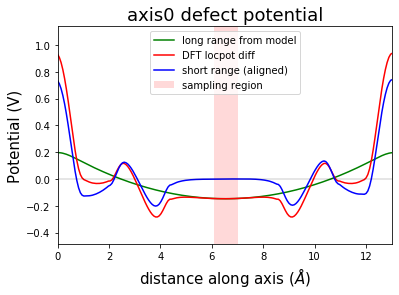

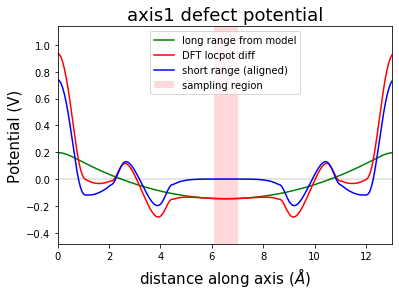

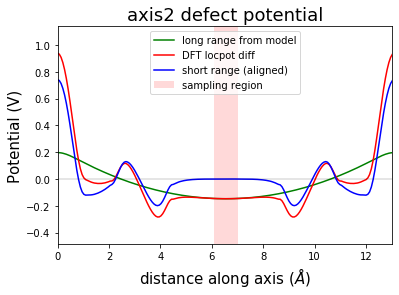

In [3]:
# plot freysoldt potential alignment plot
from doped.pycdt.core.defects_analyzer import freysoldt_correction_from_paths
defect_file_path = "Examples/as_1_Cd_on_te_-2/NUPDOWN_4/"
bulk_file_path = "Examples/Bulk_Supercell/vasp_gam/"
dielectric = 9.13 * np.array([[1., 0, 0], [0., 1., 0], [0, 0, 1.]])
defect_charge = -2

quick_fc = freysoldt_correction_from_paths(defect_file_path, bulk_file_path,
                                           dielectric, defect_charge, plot=True)  # set to True if correction plot printing is desired

# note that you can do the same with kumagai_correction_from_paths (if you have the right OUTCARs)

### Note that we can also create defect complexes
`PyCDT` can't automatically do this, but it's actually relatively simple, depending on what exactly you want to do.
Using the Cd vacancy defect, let's auto-generate all the possible defect complexes of this with another vacancy or a Te interstitial:

In [11]:
vacancies_only['vacancies'][0]['unique_site']  # This is the vacancy site

PeriodicSite: Cd (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

In [18]:
cd_vac_structure = vacancies_only['vacancies'][0]['supercell']['structure'].copy(
)
def_complex_structs = ChargedDefectsStructures(
    cd_vac_structure,
    cellmax=cd_vac_structure.num_sites,
    # max_min_oxi for bulk elements only unfortunately
    antisites_flag=False, max_min_oxi=None,
    include_interstitials=True, interstitial_elements=['Te'])

Setting up defects...
Searching for Voronoi interstitial sites (this can take awhile)...

Number of jobs created:
    bulk = 1
    vacancies:
        vac_1_Cd = 5 with site multiplicity 3
        vac_2_Cd = 5 with site multiplicity 3
        vac_3_Cd = 5 with site multiplicity 1
        vac_4_Cd = 5 with site multiplicity 12
        vac_5_Cd = 5 with site multiplicity 12
        vac_6_Te = 5 with site multiplicity 12
        vac_7_Te = 5 with site multiplicity 4
        vac_8_Te = 5 with site multiplicity 12
        vac_9_Te = 5 with site multiplicity 4
    substitutions:
    interstitials:
        Int_Te_1 = 9 with site multiplicity 12
        Int_Te_2 = 9 with site multiplicity 24
        Int_Te_3 = 9 with site multiplicity 24
        Int_Te_4 = 9 with site multiplicity 6
        Int_Te_5 = 9 with site multiplicity 12
        Int_Te_6 = 9 with site multiplicity 4
        Int_Te_7 = 9 with site multiplicity 12
        Int_Te_8 = 9 with site multiplicity 12
        Int_Te_9 = 9 with si

In [19]:
# Let's rename the defects so we know that they're complexes: (and print the defect separation)
for i in def_complex_structs.defects['interstitials']:
    i['V_Cd - Interstitial Distance (Angstrom)'] = i['unique_site'].distance(
        vacancies_only['vacancies'][0]['unique_site'])
    i['name'] = 'V_Cd-' + i['name']
sorted_def_complexes = sorted(
    def_complex_structs.defects['interstitials'], key=lambda defect: defect['V_Cd - Interstitial Distance (Angstrom)'])

In [22]:
for i in sorted_def_complexes:
    print(i['name'])
    print(i['bulk_supercell_site'].frac_coords, i['site_specie'])
    print("V_Cd - Interstitial Distance (Angstrom):",
          f"{i['V_Cd - Interstitial Distance (Angstrom)']:.3f}", '\n')

V_Cd-Int_Te_20
[0. 0. 1.] Te
V_Cd - Interstitial Distance (Angstrom): 0.000 

V_Cd-Int_Te_6
[0.10416667 0.89583333 0.89583333] Te
V_Cd - Interstitial Distance (Angstrom): 2.361 

V_Cd-Int_Te_7
[0.0625 0.8125 0.9375] Te
V_Cd - Interstitial Distance (Angstrom): 2.713 

V_Cd-Int_Te_4
[0.75 1.   0.  ] Te
V_Cd - Interstitial Distance (Angstrom): 3.272 

V_Cd-Int_Te_5
[0.6875 0.9375 0.9375] Te
V_Cd - Interstitial Distance (Angstrom): 4.250 

V_Cd-Int_Te_10
[0.1875 0.8125 0.8125] Te
V_Cd - Interstitial Distance (Angstrom): 4.250 

V_Cd-Int_Te_9
[0.6875 0.1875 0.1875] Te
V_Cd - Interstitial Distance (Angstrom): 5.363 

V_Cd-Int_Te_8
[0.625 0.125 0.125] Te
V_Cd - Interstitial Distance (Angstrom): 5.425 

V_Cd-Int_Te_11
[0.25 0.75 0.75] Te
V_Cd - Interstitial Distance (Angstrom): 5.667 

V_Cd-Int_Te_19
[0.75 0.25 0.25] Te
V_Cd - Interstitial Distance (Angstrom): 5.667 

V_Cd-Int_Te_13
[0.8125 0.3125 0.6875] Te
V_Cd - Interstitial Distance (Angstrom): 6.283 

V_Cd-Int_Te_2
[0.0625 0.1875 0.5625] 

Choosing which defect complexes you want to investigate, you can then use `vasp_input.prepare_vasp_defect_inputs`, `vasp_input.prepare_vasp_defect_dict`, ` vasp_input.vasp_gam_files` etc. again.
Just one thing to note if/when calculating corrections on defect complexes:

In [ ]:
# We've also added actual_bulk optional argument to SingleDefectParser.get_bulk_gap_data(), in case we're
# looking at defect complexes (so the SingleDefectParser 'bulk' is actually the original point defect,
# with the wrong pmg-computed gap) - provide the path to the actual perfect bulk CdTe, with the correct band gap
#sdp.get_bulk_gap_data(no_MP=True, actual_bulk_path="Examples/Bulk_Supercell/")

## Chemical Potentials   
Using the example of $Cs_3Bi_2Br_9$ in this case:

In [2]:
from doped.pycdt.core.chemical_potentials import UserChemPotInputGenerator
#from doped.vasp_input import is_metal
# Note that we've modified setup_phase_diagram_calculations in UserChemPotInputGenerator to also
# print EaH (energy above hull) in name, not print MPID in name, give a dictionary of dictionaries
# (rather than a dictionary of structures etc.)
# Added write_files option to (not) write POSCAR files and folders (better to just generate structures and
# write files ourselves with vasp_converge_files etc)(POSCAR can have wrong ordering - fucks with POTCAR)

# If you are writing the files (to the PhaseDiagram folder), I've added the overwrite option
# to (over)write files even if the PhaseDiagram folder already exists
from pymatgen.core.composition import Composition
cpa = UserChemPotInputGenerator(Composition({'Cs': 3, 'Bi': 2, 'Br': 9}))
cs3bi2br9_chempot_calcs = cpa.setup_phase_diagram_calculations(energy_above_hull=0.07, full_phase_diagram=False,
                                                     write_files=False, overwrite=True,
                                                     include_elements=True)
# This creates the structures needed for chemical potential calculations, with 0.07 eV of the (MP-calculated)
# energy above hull.
# I've added the include_elements option, so that we can use full_phase_diagram=False to only include
# necessary chemical potential calculations (i.e. facets adjacent to the composition of interest in the
# GGA phase diagram), and include_elements=True to include necessary elemental reference energy calculations

Returning chempot structures, but ain't making no crap POSCAR files.


In [3]:
for i in cs3bi2br9_chempot_calcs.keys():
    print(i)

Bi_EaH=0.000
Bi_EaH=0.067
Bi_EaH=0.061
Bi_EaH=0.063
Bi_EaH=0.059
BiBr3_EaH=0.002
BiBr3_EaH=0.062
BiBr3_EaH=0.000
Cs3Bi2Br9_EaH=0.001
Cs3Bi2Br9_EaH=0.000
Br_EaH=0.000
CsBr_EaH=0.040
CsBr3_EaH=0.000
CsBr_EaH=0.000
Cs_EaH=0.042
Cs_EaH=0.051
Cs_EaH=0.045
Cs_EaH=0.040
Cs_EaH=0.041
Cs_EaH=0.000
Cs_EaH=0.050
Cs_EaH=0.035
Cs_EaH=0.056
Cs_EaH=0.039
Cs_EaH=0.052


**Single-Shot GGA DFT `vasp_std` Convergence Tests**   
Even if we're actually going to calculate the chemical potentials with hybrid DFT, we can use the convergence behaviour of standard GGA DFT to efficiently determine converged calculation parameters. Recommended to use [vaspup2.0](https://github.com/kavanase/vaspup2.0) - here we'll generate the `input` files:

In [4]:
CONFIG = f"""# vaspup2.0 - Seán Kavanagh (sean.kavanagh.19@ucl.ac.uk), 2020
# This is the default config for automating convergence.
# Works for ground-state energy convergence and DFPT convergence.
# Make sure to rename to CONFIG before running.

conv_encut="0"          # No ENCUT convergence testing for chemical potential calcs 
# Use same ENCUT as for defect calculations

conv_kpoint="1"         # 1 for ON, 0 for OFF (KPOINTS Convergence Testing)
kpoints='' # Make with 'kgs_gen_kpts 10 30' (or higher real space cutoff if needs be)

run_vasp="1" # Run VASP after generating the files with 'generate-converge'"""

In [5]:
vasp_input.vasp_converge_files?

Signature:
vasp_input.vasp_converge_files(
    structure: 'pymatgen.core.Structure',
    input_dir: str = None,
    incar_settings: dict = None,
    config: str = None,
) -> None
Docstring:
Generates input files for single-shot GGA convergence test calculations.
Automatically sets ISMEAR (in INCAR) to 2 (if metallic) or 0 if not.
Recommended to use with vaspup2.0
Args:
    structure (Structure object):
        Structure to create input files for.
    input_dir (str):
        Folder in which to create 'input' folder with VASP input files.
        (default: None)
    incar_settings (dict):
        Dictionary of user INCAR settings (AEXX, NCORE etc.) to override default settings.
        Highly recommended to look at output INCARs or doped.vasp_input
        source code, to see what the default INCAR settings are.
        (default: None)
    config (str):
        CONFIG file string. If provided, will also write the CONFIG file (to automate
        convergence tests with vaspup2.0) to each

**Note:** In order to use this function to generate the input `POTCAR` files for the `VASP` calculations, you need to have your pseudopotential directory (`PSP_VASP_DIR`) set in your `.pmgrc.yaml` file (see https://pymatgen.org/usage.html#setting-the-pmg-mapi-key-in-the-config-file).

In [6]:
from doped import vasp_input
for key, val in cs3bi2br9_chempot_calcs.items():
    vasp_input.vasp_converge_files(
        val['Structure'], input_dir='PhaseDiagram/'+key)

Have a look at the auto-generated files in the `PhaseDiagram` folder!

In [26]:
for key, val in cs3bi2br9_chempot_calcs.items():
    vasp_input.vasp_converge_files(
        val['Structure'], input_dir='PhaseDiagram/'+key, config=CONFIG)
# Use this if you also want to write the CONFIG files to each 'input' directory, ready to go with vaspup2.0

After generating the input files like this, can then use [vaspup2.0](https://github.com/kavanase/vaspup2.0) (via the `input/CONFIG` file) to set the range of `ENCUT` and `KPOINTS` you want to check for convergence. Alternatively, you can use these input files to manually run convergence tests (but why would you wan't to do it manually...).

### `vasp_std` Chemical Potential Relaxations (Work in Progress)
Once the converged calculation parameters (`ENCUT` and **_k_**-density) have been determined, using [vaspup2.0](https://github.com/kavanase/vaspup2.0) or manually, you can then auto-generate the input files for the `vasp_std` relaxation (and final single-shot energy calculation) as follows:

In [8]:
import numpy as np
# Converged calculation parameters from vaspup2.0 quick convergence tests:

chempot_calcs['Bi_EaH=0.000']['Converged k-mesh'] = np.array([13, 13, 12])
chempot_calcs['Bi_EaH=0.067']['Converged k-mesh'] = np.array([13, 15, 9])
# (16, 16, 16) with ISMEAR = -5
chempot_calcs['Bi_EaH=0.061']['Converged k-mesh'] = np.array([20, 20, 20])
chempot_calcs['Bi_EaH=0.063']['Converged k-mesh'] = np.array([18, 19, 13])
chempot_calcs['Bi_EaH=0.059']['Converged k-mesh'] = np.array([17, 17, 13])
chempot_calcs['BiBr3_EaH=0.002']['Converged k-mesh'] = np.array([4, 4, 4])
chempot_calcs['BiBr3_EaH=0.062']['Converged k-mesh'] = np.array([3, 3, 3])
chempot_calcs['BiBr3_EaH=0.000']['Converged k-mesh'] = np.array([4, 2, 3])
chempot_calcs['Cs3Bi2Br9_EaH=0.001']['Converged k-mesh'] = np.array([3, 3, 2])
chempot_calcs['Cs3Bi2Br9_EaH=0.000']['Converged k-mesh'] = np.array([4, 4, 3])
chempot_calcs['CsBr_EaH=0.040']['Converged k-mesh'] = np.array([5, 5, 5])
chempot_calcs['CsBr3_EaH=0.000']['Converged k-mesh'] = np.array([3, 3, 3])
chempot_calcs['CsBr_EaH=0.000']['Converged k-mesh'] = np.array([4, 4, 4])
chempot_calcs['Cs_EaH=0.042']['Converged k-mesh'] = np.array([9, 9, 3])
chempot_calcs['Cs_EaH=0.051']['Converged k-mesh'] = np.array([5, 5, 5])
chempot_calcs['Cs_EaH=0.045']['Converged k-mesh'] = np.array([9, 5, 5])
chempot_calcs['Cs_EaH=0.040']['Converged k-mesh'] = np.array([9, 9, 10])
chempot_calcs['Cs_EaH=0.041']['Converged k-mesh'] = np.array([14, 14, 14])
chempot_calcs['Cs_EaH=0.000']['Converged k-mesh'] = np.array([3, 3, 3])
chempot_calcs['Cs_EaH=0.050']['Converged k-mesh'] = np.array([5, 5, 9])
chempot_calcs['Cs_EaH=0.035']['Converged k-mesh'] = np.array([10, 10, 10])
chempot_calcs['Cs_EaH=0.056']['Converged k-mesh'] = np.array([5, 5, 5])
chempot_calcs['Cs_EaH=0.039']['Converged k-mesh'] = np.array([5, 5, 5])
chempot_calcs['Cs_EaH=0.052']['Converged k-mesh'] = np.array([5, 5, 5])